In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

In [28]:
# Import data
df_previous = pd.read_csv('Resources/season_stats_2122_2324.csv')
df_current = pd.read_csv('Resources/season_stats_2425.csv')

In [30]:
# Create Points Per Game Metric
df_previous['PPG'] = df_previous['Points'] / df_previous['GP']

In [32]:
# Preview data for data from 2021/2022 through 2023/2024 season
df_previous

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,...,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO,PPG
0,1,Anaheim Ducks,246,14939.2667,81,134,31,73,193,0.392,...,44.75,117,174,40.21,4.18,94.96,9.21,89.60,0.988,0.784553
1,2,Arizona Coyotes,246,14925.2833,89,131,26,83,204,0.415,...,43.49,120,151,44.28,4.58,95.57,10.51,89.53,1.000,0.829268
2,3,Boston Bruins,246,14945.0500,163,58,25,153,351,0.713,...,50.34,133,95,58.33,4.25,96.92,10.13,91.61,1.017,1.426829
3,4,Buffalo Sabres,246,14909.6167,113,109,24,105,250,0.508,...,50.88,144,133,51.99,4.44,95.75,10.01,89.42,0.994,1.016260
4,5,Carolina Hurricanes,246,14932.6000,158,64,24,151,340,0.691,...,59.81,128,78,62.14,3.45,96.87,9.73,90.51,1.002,1.382114
5,6,Columbus Blue Jackets,246,14917.5500,89,129,28,81,206,0.419,...,46.17,124,164,43.06,4.02,95.44,9.63,89.28,0.989,0.837398
6,7,Calgary Flames,246,14927.0500,126,87,33,122,285,0.579,...,55.89,137,107,56.15,3.98,96.06,9.51,89.80,0.993,1.158537
7,8,Chicago Blackhawks,246,14913.6833,77,144,25,68,179,0.364,...,45.80,83,153,35.17,2.94,95.43,8.82,89.23,0.980,0.727642
8,9,Colorado Avalanche,246,14933.7833,157,68,21,145,335,0.681,...,51.44,163,121,57.39,4.75,96.26,10.64,90.71,1.014,1.361789
9,10,Dallas Stars,246,14965.9000,145,72,29,132,319,0.648,...,48.46,107,117,47.77,3.67,96.23,10.50,90.60,1.011,1.296748


In [34]:
# Create Points Per Game Metric
df_current['PPG'] = df_current['Points'] / df_current['GP']

In [36]:
# Preview data for data for the 2024/2025 season (current season)
df_current

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,...,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO,PPG
0,1,Anaheim Ducks,39,2372.0833,17,18,4,15,38,0.487,...,46.95,20,15,57.14,4.33,97.13,9.01,90.59,0.996,0.974359
1,2,Boston Bruins,42,2549.8833,20,17,5,20,45,0.536,...,49.75,17,17,50.00,3.45,96.59,9.47,88.45,0.979,1.071429
2,3,Buffalo Sabres,40,2425.9500,14,21,5,13,33,0.413,...,51.46,18,17,51.43,3.64,96.36,11.20,88.32,0.995,0.825000
3,4,Carolina Hurricanes,40,2417.1667,24,14,2,24,50,0.625,...,61.26,31,25,55.36,5.40,93.11,10.60,88.82,0.994,1.250000
4,5,Columbus Blue Jackets,40,2424.6833,17,17,6,15,40,0.500,...,50.15,24,31,43.64,4.70,93.90,11.18,87.57,0.988,1.000000
5,6,Calgary Flames,39,2378.4167,18,14,7,15,43,0.551,...,50.92,19,20,48.72,3.82,95.83,8.88,89.57,0.984,1.102564
6,7,Chicago Blackhawks,40,2408.5667,13,25,2,12,28,0.350,...,47.05,20,24,45.45,4.40,95.31,9.88,88.65,0.985,0.700000
7,8,Colorado Avalanche,40,2417.9000,24,15,1,23,49,0.613,...,50.92,29,26,52.73,6.14,94.29,11.55,87.90,0.995,1.225000
8,9,Dallas Stars,38,2291.1167,24,13,1,23,49,0.645,...,52.43,19,14,57.58,4.09,96.67,10.42,90.46,1.009,1.289474
9,10,Detroit Red Wings,39,2357.4000,17,18,4,16,38,0.487,...,41.57,15,37,28.85,4.00,92.98,10.75,89.01,0.998,0.974359


In [38]:
# Prepare features and target variable
features = ['CF%', 'FF%', 'SF%', 'GF%', 'xGF%', 'SCF%', 'SCSF%', 'SCGF%', 'HDCF%', 'HDSF%', 'HDGF%', 'SH%', 'SV%']
target = 'PPG'

X = df_previous[features]
y = df_previous[target]

In [40]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit Random Forest Model

In [45]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Make predictions on test set
y_pred = rf_model.predict(X_test_scaled)

## Evaluate Model

In [52]:
#cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(
 #   cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)

# Calculating the accuracy score
#acc_score = accuracy_score(y_test, y_pred)

In [54]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.0008464567027524019
R-squared Score: 0.9731718878410777


## Apply Model to Current Season

In [57]:
# Prepare current season data
X_current = df_current[features]
X_current_scaled = scaler.transform(X_current)

In [59]:
# Predict points for current season
current_predictions = rf_model.predict(X_current_scaled)

In [61]:
# Adjust predictions for 82-game schedule
#games_played = df_current['GP']
#adjusted_predictions = (current_predictions / 3) * (82 / games_played)

In [63]:
# Add predictions to current season dataframe
df_current['RF_Predicted_PPG'] = current_predictions
df_current['RF_Predicted_Points'] = (current_predictions *82).round().astype(int)

In [65]:
# Display results
#print(df_current[['Team', 'GP', 'Points', 'RF_Predicted_PPG', 'RF_Predicted_Points']])
print(df_current[['Team', 'GP', 'Points', 'RF_Predicted_PPG', 'RF_Predicted_Points']].sort_values(by='RF_Predicted_Points', ascending=False))

                     Team  GP  Points  RF_Predicted_PPG  RF_Predicted_Points
30          Winnipeg Jets  41      56          1.365737                  112
31    Washington Capitals  39      55          1.347884                  111
29   Vegas Golden Knights  39      57          1.359221                  111
25    Tampa Bay Lightning  37      42          1.340971                  110
15      New Jersey Devils  42      51          1.327899                  109
8            Dallas Stars  38      49          1.334921                  109
12      Los Angeles Kings  38      51          1.284119                  105
26    Toronto Maple Leafs  41      54          1.283192                  105
3     Carolina Hurricanes  40      50          1.195696                   98
13         Minnesota Wild  40      54          1.195289                   98
10        Edmonton Oilers  39      51          1.178483                   97
11       Florida Panthers  40      50          1.090070                   89

## Feature Importance

In [68]:
# Use sklearn to calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3110705775694028, 'SV%'),
 (0.23654506245266438, 'GF%'),
 (0.21652854341758326, 'SCGF%'),
 (0.07754649109744706, 'HDGF%'),
 (0.04688277909477455, 'SCSF%'),
 (0.021292026153353905, 'SF%'),
 (0.02125289861464508, 'HDSF%'),
 (0.02011892367042115, 'SCF%'),
 (0.015979210987127863, 'SH%'),
 (0.01223689923837738, 'HDCF%'),
 (0.008259714229920875, 'CF%'),
 (0.00642395025746004, 'xGF%'),
 (0.005862923216821598, 'FF%')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

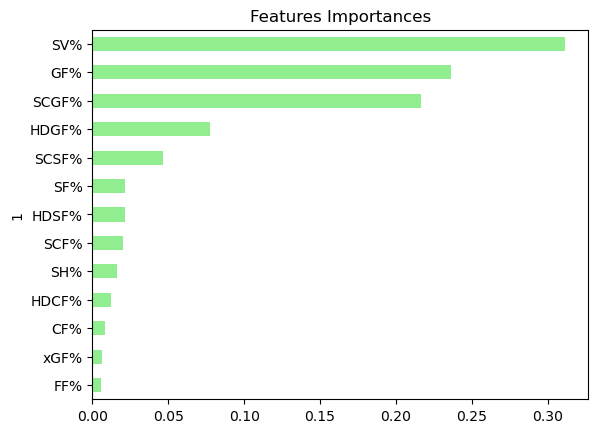

In [70]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Fit Neural Network Model

In [ ]:
# Train Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Predict points for current season using Neural Network
nn_predictions = nn_model.predict(X_current_scaled).flatten()

In [ ]:
# Add Neural Network predictions to current season dataframe
#df_current['RF_Predicted_Points'] = rf_adjusted_predictions.round().astype(int)
df_current['NN_Predicted_Points'] = nn_predictions.round().astype(int)

In [ ]:
# Display results
print(df_current[['Team', 'GP', 'Points', 'RF_Predicted_Points', 'NN_Predicted_Points']])